# Data Prepration

In [1]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Img_Dir = "/media/abhishek/589E61B39E618A783/C-DAC Document/Practical Machine Learning/PML/Code/Dataset/images"

In [3]:
df = pd.DataFrame(columns = ["image_name", "label"])

In [4]:
df

,image_name,label


In [5]:
for index, image in enumerate(os.listdir(Img_Dir)):
    if image.startswith("P"):
        df.loc[index, "image_name"] = image
        df.loc[index, "label"] = "POLLEN"
    elif image.startswith("N"):
        df.loc[index] = [image, "NON POLLEN"]      

In [6]:
df

,image_name,label
0,NP10057-126r.jpg,NON POLLEN
1,NP10109-128r.jpg,NON POLLEN
2,NP10154-130r.jpg,NON POLLEN
3,NP10304-132r.jpg,NON POLLEN
4,NP1034-9r.jpg,NON POLLEN
...,...,...
709,NP56585-113r.jpg,NON POLLEN
710,NP56840-115r.jpg,NON POLLEN
711,NP56909-117r.jpg,NON POLLEN
712,NP57225-119r.jpg,NON POLLEN


In [7]:
df.size

1428

In [8]:
train_DataGen = ImageDataGenerator(rescale = 1/255,
                                  validation_split = 0.8)

test_DataGen = ImageDataGenerator(rescale = 1/255)

In [9]:
train_df, test_df = train_test_split(df, test_size = 0.2, shuffle = True, random_state = 10)

In [10]:
train_images = train_DataGen.flow_from_dataframe(dataframe = train_df,
                                                      x_col = "image_name",
                                                      y_col = "label",
                                                      directory = Img_Dir,
                                                      target_size = (200,200),
                                                      class_mode = "binary",
                                                      seed = 300,
                                                      subset = 'training')

val_images = train_DataGen.flow_from_dataframe(dataframe = train_df,
                                                    x_col = "image_name",
                                                    y_col = "label",
                                                    directory = Img_Dir,
                                                    target_size = (200,200),
                                                    class_mode = "binary",
                                                    seed = 300,
                                                    subset = 'validation')

test_images = test_DataGen.flow_from_dataframe(dataframe = test_df,
                                                      x_col = "image_name",
                                                      y_col = "label",
                                                      directory = Img_Dir,
                                                      target_size = (200,200),
                                                      class_mode = "binary")

Found 115 validated image filenames belonging to 2 classes.
Found 456 validated image filenames belonging to 2 classes.
Found 143 validated image filenames belonging to 2 classes.


In [11]:
test_images.image_shape

(200, 200, 3)

# Define the Model

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(filters = 40, kernel_size = (3,3), activation = 'relu', input_shape = (200,200,3), name = "Input_layer"))
model.add(MaxPool2D((2,2), name = "Pooling_1"))

In [14]:
model.add(Conv2D(filters = 80, kernel_size = (3,3), activation = 'relu', name = "Conv_layer"))
model.add(MaxPool2D((2,2), name = "Pooling_2"))

In [15]:
model.add(Flatten())
model.add(Dense(200, activation = 'relu', name = "Dense_1"))
model.add(Dense(100, activation = 'relu', name = "Dense_2"))
model.add(Dense(1, activation = 'sigmoid', name = "Output_Layer"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Conv2D)         (None, 198, 198, 40)      1120      
_________________________________________________________________
Pooling_1 (MaxPooling2D)     (None, 99, 99, 40)        0         
_________________________________________________________________
Conv_layer (Conv2D)          (None, 97, 97, 80)        28880     
_________________________________________________________________
Pooling_2 (MaxPooling2D)     (None, 48, 48, 80)        0         
_________________________________________________________________
flatten (Flatten)            (None, 184320)            0         
_________________________________________________________________
Dense_1 (Dense)              (None, 200)               36864200  
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               2

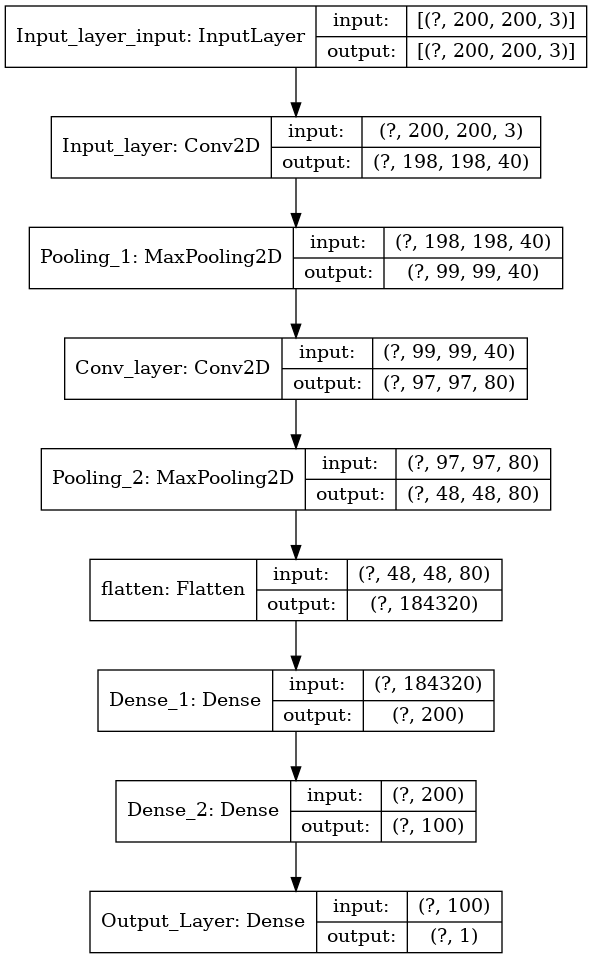

In [17]:
plot_model(model, to_file = 'cnn_model.png', show_shapes=True)

# Compile the model

In [18]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = 'accuracy')

# Train the Model

In [19]:
train_images.class_indices

{'NON POLLEN': 0, 'POLLEN': 1}

In [20]:
es_callback = EarlyStopping(monitor = 'val_loss',
                           patience = 3,
                           restore_best_weights = True)

In [24]:
%time history = model.fit(train_images, epochs = 10, validation_data = val_images, callbacks = [es_callback])

Epoch 1/10
4/4 [==============================] - 10s 3s/step - loss: 1.9730 - accuracy: 0.4609 - val_loss: 0.6638 - val_accuracy: 0.6272
Epoch 2/10
4/4 [==============================] - 2s 574ms/step - loss: 0.6325 - accuracy: 0.6870 - val_loss: 0.6553 - val_accuracy: 0.5461
Epoch 3/10
4/4 [==============================] - 1s 345ms/step - loss: 0.5637 - accuracy: 0.7565 - val_loss: 0.5639 - val_accuracy: 0.7412
Epoch 4/10
4/4 [==============================] - 2s 512ms/step - loss: 0.4086 - accuracy: 0.8261 - val_loss: 0.5395 - val_accuracy: 0.7434
Epoch 5/10
4/4 [==============================] - 1s 317ms/step - loss: 0.2933 - accuracy: 0.8696 - val_loss: 0.5701 - val_accuracy: 0.7675
Epoch 6/10
4/4 [==============================] - 1s 289ms/step - loss: 0.2632 - accuracy: 0.8609 - val_loss: 0.7221 - val_accuracy: 0.7346
Epoch 7/10
4/4 [==============================] - 2s 378ms/step - loss: 0.1869 - accuracy: 0.9043 - val_loss: 0.8454 - val_accuracy: 0.7193
CPU times: user 13.4 s

In [21]:
from tensorflow.python.client import device_lib

In [22]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 305687939205993682
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 463115651599680441
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3862560768
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15629604130565867807
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15226057790482969779
physical_device_desc: "device: XLA_GPU device"
]


In [23]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

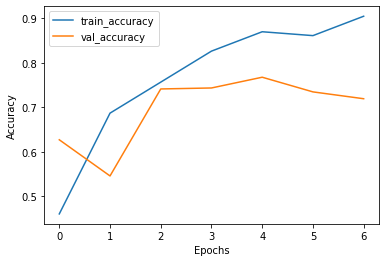

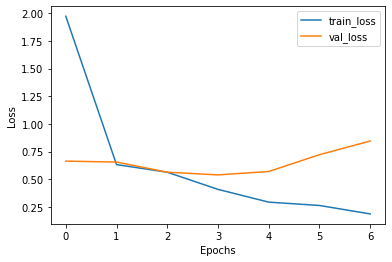

In [26]:
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model

In [27]:
model.evaluate(test_images)

5/5 [==============================] - 3s 526ms/step - loss: 0.4871 - accuracy: 0.7762


[0.48713645339012146, 0.7762237787246704]

In [28]:
test_images.class_indices

{'NON POLLEN': 0, 'POLLEN': 1}

In [29]:
test_images.labels

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1]

In [30]:
predict = np.reshape(model.predict(test_images) > 0.6,-1).astype(int)

In [31]:
cn = confusion_matrix(test_images.labels, predict)

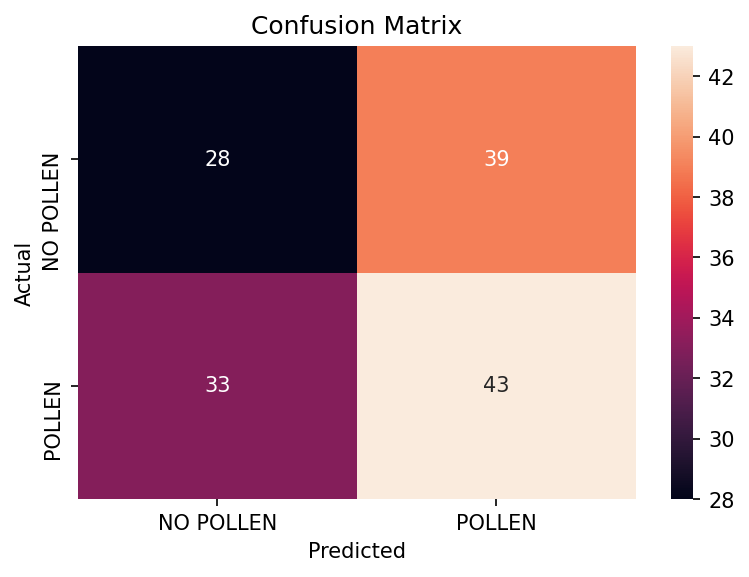

In [32]:
plt.figure(dpi = 150)
sns.heatmap(cn, annot = True)
plt.xticks(ticks=[0.5,1.5], labels=['NO POLLEN', 'POLLEN'])
plt.yticks(ticks=[0.5,1.5], labels=['NO POLLEN', 'POLLEN'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
print(classification_report(test_images.labels, predict))

              precision    recall  f1-score   support

           0       0.46      0.42      0.44        67
           1       0.52      0.57      0.54        76

    accuracy                           0.50       143
   macro avg       0.49      0.49      0.49       143
weighted avg       0.49      0.50      0.49       143



In [34]:
np.unique(test_images.labels, return_counts = True)

(array([0, 1]), array([67, 76]))